In [1]:
import numpy as np 
import os
import glob
import pandas as pd
from sklearn.metrics import r2_score
from scipy import optimize as som
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CURR_DIR = os.getcwd()

MAIN_DIR = '.'
if os.path.basename(CURR_DIR)!="Project_Work22.04":
    os.chdir("..")
DATA_DIR = os.path.join(MAIN_DIR,"Data")
FITS_DIR = os.path.join(MAIN_DIR,"Fits")
FIG_DIR = os.path.join(MAIN_DIR,"Project-Files/Figures/")

In [3]:
data_files = sorted(glob.glob(DATA_DIR + "/**/*.csv", recursive=True))
data_files

['./Data/GD61-100pxData-Sheet1.csv',
 './Data/GD61_simbad.csv',
 './Data/Gaia-WD0011-399.csv',
 './Data/Gaia-result.csv',
 './Data/WD0011-399_AKARI.csv',
 './Data/WD0011-399_IRAS.csv',
 './Data/WD0011-399_WISE.csv',
 './Data/WD0011-399_zSimbad.csv',
 './Data/akariup_final.csv']

In [4]:
data_akari = pd.read_csv(data_files[4])
data_akari

,F90,x,y,RA,DEC,F140,x1,y1,RA1,DEC1
0,0.762714,1,30,3.856797,-39.115224,3.066137,1,30,3.856797,-39.115224
1,1.286675,2,30,3.849064,-39.115231,2.553307,2,30,3.849064,-39.115231
2,1.758307,3,30,3.841331,-39.115238,2.927438,3,30,3.841331,-39.115238
3,1.834949,4,30,3.833598,-39.115244,3.635061,4,30,3.833598,-39.115244
4,1.411721,5,30,3.825865,-39.115250,4.300227,5,30,3.825865,-39.115250
...,...,...,...,...,...,...,...,...,...,...
895,2.257539,26,1,3.663267,-39.289249,3.044896,26,1,3.663267,-39.289249
896,2.256902,27,1,3.655515,-39.289244,3.667239,27,1,3.655515,-39.289244
897,1.711771,28,1,3.647762,-39.289238,3.003741,28,1,3.647762,-39.289238
898,1.685992,29,1,3.640010,-39.289231,2.440917,29,1,3.640010,-39.289231


In [5]:
data_iras = pd.read_csv(data_files[5])
data_iras

,F60,x,y,RA,DEC,F100,x1,y1,RA1,DEC1
0,0.632244,1,25,4.106359,-38.961595,1.756098,1,25,4.106359,-38.961595
1,0.646267,2,25,4.080639,-38.961660,1.764143,2,25,4.080639,-38.961660
2,0.713218,3,25,4.054918,-38.961719,1.685077,3,25,4.054918,-38.961719
3,0.640321,4,25,4.029197,-38.961773,1.639124,4,25,4.029197,-38.961773
4,0.640321,5,25,4.003477,-38.961821,1.639124,5,25,4.003477,-38.961821
...,...,...,...,...,...,...,...,...,...,...
620,0.637537,21,1,3.590529,-39.441815,1.567818,21,1,3.590529,-39.441815
621,0.557569,22,1,3.564632,-39.441766,1.552701,22,1,3.564632,-39.441766
622,0.557569,23,1,3.538735,-39.441711,1.552701,23,1,3.538735,-39.441711
623,0.544347,24,1,3.512838,-39.441651,1.507985,24,1,3.512838,-39.441651


In [6]:
data_wise = pd.read_csv(data_files[6])
data_wise

,F12,x,y,RA,DEC,F22,x1,y1,RA1,DEC1
0,425.113007,1,30,3.806996,-39.153928,127.219253,1,30,3.806996,-39.153928
1,424.051025,2,30,3.802697,-39.153930,127.189728,2,30,3.802697,-39.153930
2,423.813385,3,30,3.798399,-39.153932,127.183258,3,30,3.798399,-39.153932
3,424.799988,4,30,3.794100,-39.153934,127.265892,4,30,3.794100,-39.153934
4,424.565796,5,30,3.789802,-39.153936,127.223099,5,30,3.789802,-39.153936
...,...,...,...,...,...,...,...,...,...,...
895,424.526001,26,1,3.699470,-39.250602,127.229324,26,1,3.699470,-39.250602
896,425.028381,27,1,3.695165,-39.250601,127.294769,27,1,3.695165,-39.250601
897,424.715057,28,1,3.690861,-39.250599,127.293732,28,1,3.690861,-39.250599
898,425.010651,29,1,3.686556,-39.250597,127.313255,29,1,3.686556,-39.250597


In [ ]:
data_akari = data_akari[data_akari.F90>12]
data_akari = data_akari[data_akari.F140>22]

data_iras = data_iras[data_iras.F60>0.7]
data_iras = data_iras[data_iras.F100>2.9]

data_wise = data_wise[data_wise.F12>440]
data_wise = data_wise[data_wise.F22>128]

In [79]:
def emissivity(F1, F2, mode="iras"):
    a = np.arange(0,3.1, 0.1)
    Temp = []
    Beta = []
    coeff = -96
    if mode=="akari": coeff = -57
    elif mode=="wise": coeff = -545.13
        
    for r in a:
        T = [coeff/(np.log((F1/F2)*0.64**(r+3)))]
        Temp.append(T)
        Beta.append(r)
        
    Tavg = [np.mean(Temp[i]) for i in range(31)]
    yerr = np.std(Tavg)/np.sqrt(len(Tavg))
    Tavg = np.array(Tavg)
    
    def fun(Tav, a, b):
        Beta = float(1)/(a+(b*Tavg))
        return Beta
    
    yerr = np.std(Beta)/np.sqrt(len(Beta))
    return Tavg, yerr, Beta

In [121]:
def plot(Tavg, yerr, Beta, title):
    plt.figure(figsize = [6,5])
    mymodel = np.poly1d(np.polyfit(Tavg, Beta, 2))
    popt, pcov = som.curve_fit(fun, Tavg, Beta)
    fit_data = fun(Tavg, popt[0], popt[1])
    (_, caps, _) = plt.errorbar(Tavg, Beta, yerr, fmt='ok', capsize=3, elinewidth=1, label = 'Data Points with SE')

    r2_parab = np.round(r2_score(Beta, mymodel(Tavg)),2)
    r2_hyp = np.round(r2_score(Beta, fit_data),2)
    for cap in caps:
        cap.set_color('b')
        cap.set_markeredgewidth(3)
    plt.title(title, weight='bold')
    plt.plot(Tavg, mymodel(Tavg), color = 'r', lw = 3, label = 'Best Fit parabola, r$^2$='+str(r2_parab))
#     plt.plot(Tav, fit_data,'--', label='Best Fit Hyperbola, r$^2$='+str(r2_hyp), color = 'r', lw = 3)
    plt.ylabel('Spectral Index', weight = None, fontsize = 14, color = 'k')
    plt.xlabel('Average Temperature (K)', weight = None,fontsize = 14, color = 'k')
    plt.legend(fontsize = 12,)
    plt.xticks(fontweight = None ,fontsize = 12, color = 'k')
    plt.yticks(fontweight = None ,fontsize = 12, color = 'k')
    plt.tight_layout()

(24.59031577548402, 0.1606438657804998)

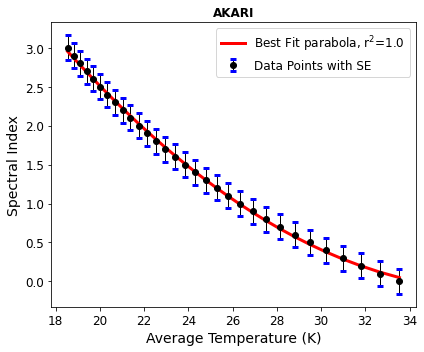

In [122]:
Tavg_akari, yerr_akari, Beta_akari = emissivity(data_akari.F90, data_akari.F140, mode="akari")
plot(Tavg_akari, yerr_akari, Beta_akari, 'AKARI')
plt.savefig(FIG_DIR+"akari_emissivity.png")
np.mean(Tavg_akari), yerr_akari

(32.66204361062239, 0.1606438657804998)

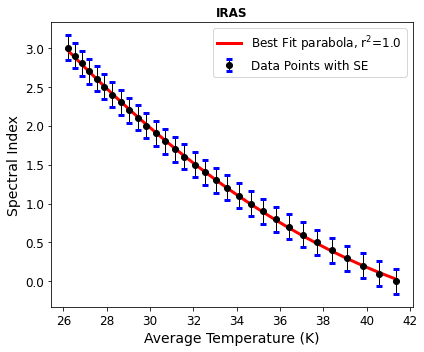

In [123]:
Tavg_iras, yerr_iras, Beta_iras = emissivity(data_iras.F60, data_iras.F100)
plot(Tavg_iras, yerr_iras, Beta_iras, "IRAS")
plt.savefig(FIG_DIR+"iras_emissivity.png")

np.mean(Tavg_iras), yerr_iras

(1035.7613482865163, 0.1606438657804998)

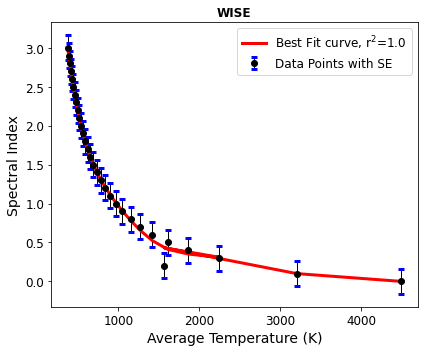

In [117]:
Tavg_wise, yerr_wise, Beta_wise = emissivity(data_wise.F12, data_wise.F22, mode="wise")
plot(Tavg_wise, yerr_wise, Beta_wise, "WISE")
plt.savefig(FIG_DIR+"wise_emissivity.png")

np.mean(Tavg_wise), yerr_wise

In [77]:
Temp = []
Beta = []
for r in a: #for loop
    T = [-545.13/(np.log((data_wise.F12/data_wise.F22)*0.64**(r+3)))]
    Temp.append(T)
    Beta.append(r)
len(Temp), len(Beta)

(31, 31)

In [78]:
Tav = [np.mean(Temp[i]) for i in range(31)]
yerr = np.std(Tav)/np.sqrt(len(Tav))
np.mean(Tav),np.std(Tav),len(Tav), yerr

(1035.7613482865163, 888.780595999544, 31, 159.62970738003511)

In [69]:
Tav = np.array(Tav)
def fun(Tav, a, b):
    Beta = float(1)/(a+(b*Tav))
    return Beta

In [70]:
yerr = np.std(Beta)/np.sqrt(len(Beta))
yerr

0.1606438657804998

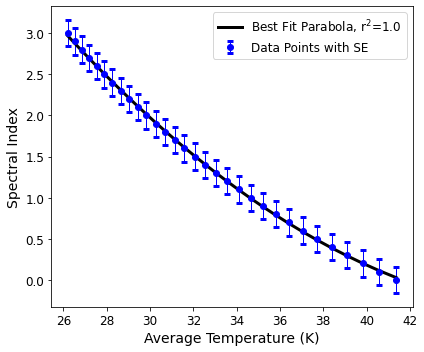

In [71]:

plt.figure(figsize = [6,5])
mymodel = np.poly1d(np.polyfit(Tav, Beta, 2))
popt, pcov = som.curve_fit(fun, Tav, Beta)
fit_data = fun(Tav, popt[0], popt[1])
(_, caps, _) = plt.errorbar(Tav, Beta, yerr, fmt='ob', capsize=3, elinewidth=1, label = 'Data Points with SE')

r2_parab = np.round(r2_score(Beta, mymodel(Tav)),2)
r2_hyp = np.round(r2_score(Beta, fit_data),2)
for cap in caps:
    cap.set_color('b')
    cap.set_markeredgewidth(3)
plt.plot(Tav, mymodel(Tav), color = 'k', lw = 3, label = 'Best Fit Parabola, r$^2$='+str(r2_parab))
# plt.plot(Tav, fit_data,'--', label='Best Fit Hyperbola, r$^2$='+str(r2_hyp), color = 'r', lw = 3)
plt.ylabel('Spectral Index', weight = None, fontsize = 14, color = 'k')
plt.xlabel('Average Temperature (K)', weight = None,fontsize = 14, color = 'k')
plt.legend(fontsize = 12,)
plt.xticks(fontweight = None ,fontsize = 12, color = 'k')
plt.yticks(fontweight = None ,fontsize = 12, color = 'k')
plt.tight_layout()

(0.6729310754085925, -64.2033766452334)

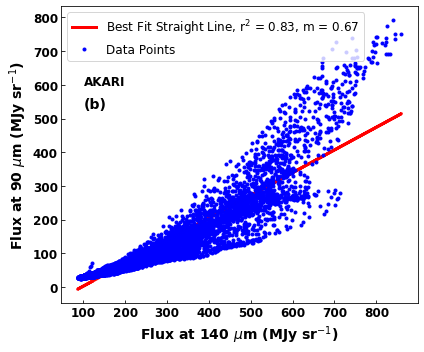

In [23]:
plt.figure(figsize = [6, 5])
#plt.title('Straight Line Fit between Flux at 60 and 100 $\mu$m', fontweight = 'bold', fontsize = 16)
def straight_line(x, m,c):
    y = m*x + c
    return y
popt, pcov = som.curve_fit(straight_line, df.f140, df.f90)
# where popt: optimal parameter, pcov : corresponding error in parameter
line_model = straight_line(df.f140, popt[0], popt[1])
plt.plot(df.f140, line_model, label='Best Fit Straight Line, r$^2$ = 0.83, m = 0.67',color = 'r', lw = 3)
plt.plot(df.f140, df.f90,'.',color = 'b', label='Data Points')
plt.xlabel('Flux at 140 $\mu$m (MJy sr$^{-1}$)',fontweight = 'bold',fontsize=14)
plt.ylabel('Flux at 90 $\mu$m (MJy sr$^{-1}$)',fontweight = 'bold',fontsize=14)
plt.legend(loc = 'best',fontsize=12)
plt.tick_params(direction='in')
plt.text(100, 600,'AKARI',fontweight = 'bold',fontsize = 12)
plt.text(100, 530,'(b)',fontweight = 'bold',fontsize = 14)
plt.xticks(fontweight = 'bold',fontsize=12, color = 'k')
plt.yticks(fontweight = 'bold',fontsize=12,color='k')
#plt.yticks([1000, 2000, 3000, 4000])
#plt.xticks([1000, 2000, 3000, 4000])
plt.tight_layout()
plt.savefig('Figure/linear_akari.png', dpi=200)
popt[0], popt[1]

In [19]:
T = -57/(np.log(popt[0]*0.64**5))
T

21.693229797046822

0.7451536820888678

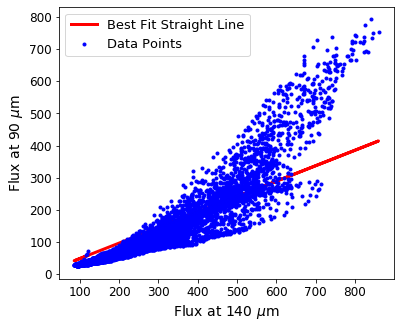

In [17]:
from sklearn.metrics import r2_score
def straight_line(x, m):
    y = m*x 
    return y
plt.figure(figsize=[6,5])
popt, pcov = som.curve_fit(straight_line, df.f140, df.f90)
# where popt: optimal parameter, pcov : corresponding error in parameter
line_model = straight_line(df.f140, popt)
plt.plot(df.f140, line_model, label='Best Fit Straight Line',color = 'r', lw = 3)
plt.plot(df.f140, df.f90,'.',color = 'b', label='Data Points')
plt.xlabel('Flux at 140 $\mu$m',fontsize=14)
plt.ylabel('Flux at 90 $\mu$m',fontsize=14)
plt.legend(fontsize=13)
plt.xticks(fontsize=12, color = 'k')
plt.yticks(fontsize=12,color='k')
#plt.savefig('Figure/f100f60.png', dpi = 400)
r2_score(df.f90,line_model) 
#popt, pcov